In [34]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(stringr)
library(Sierra)
library(presto)
library(ggplot2)
library(msigdbr)
library(fgsea)
library(sctransform)
library(tidyverse)
library(EnhancedVolcano)
setwd('/data1/APA/Paul_ALS_Data/')

Loading required package: ggrepel

Registered S3 methods overwritten by 'ggalt':
  method                  from   
  grid.draw.absoluteGrob  ggplot2
  grobHeight.absoluteGrob ggplot2
  grobWidth.absoluteGrob  ggplot2
  grobX.absoluteGrob      ggplot2
  grobY.absoluteGrob      ggplot2



In [4]:
reference.file <- '/home/aiden/data/refgenome/refdata-gex-GRCh38-2020-A/genes//genes.gtf'
gtf_gr <- rtracklayer::import(reference.file)
gtf_TxDb <- GenomicFeatures::makeTxDbFromGFF(reference.file, format="gtf")

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
OK



In [4]:
peaks_so <- readRDS('/data1/APA/Paul_ALS_Data/rdata/ALS_CT_v3_final_MD.rds')
peaks_so

An object of class Seurat 
279088 features across 73066 samples within 1 assay 
Active assay: RNA (279088 features, 0 variable features)

In [3]:
table(peaks_so$group)

ERROR: Error in table(peaks_so$group): object 'peaks_so' not found


In [6]:
table(peaks_so$sample)
## have to rename CTRL6 to CTRL5.   And CTRL7 to CTRL6


   C9ALSFTLD1    C9ALSFTLD2    C9ALSFTLD3    C9ALSFTLD4  C9ALSnoFTLD1 
         3631          7286          7677          4274          6039 
 C9ALSnoFTLD3 C9noALSnoFTLD         CTRL1         CTRL2         CTRL4 
         4889          4437          2687          4130          5225 
        CTRL6         CTRL7   sALSnoFTLD3   sALSnoFTLD4   sALSnoFTLD8 
         6244          4861          4589          3480          3617 

In [22]:
## read in the final annotated ge_So object
ge_so <- readRDS('/data1/APA/Paul_ALS_Data/ALS_snRNA_final.RDS')
ge_so <- subset(ge_so, subset=chemistry=='V3')
## filter the V3
ge_so

An object of class Seurat 
69826 features across 93074 samples within 3 assays 
Active assay: SCT (31651 features, 0 variable features)
 2 other assays present: RNA, integrated
 3 dimensional reductions calculated: pca, tsne, umap

In [12]:
## need to add CTRL3 and sALSnoFTLD5
## get barcodes for CTRL3 and sALSFTLD5 and then subset bam again to see if this will resolve the issue

In [14]:
ctrl3_cb <- Cells(subset(ge_so, subset=sample=='CTRL3'))
sALSnoFTLD5_cb <- Cells(subset(ge_so,subset=sample=='sALSnoFTLD5'))

In [16]:
ctrl3_cb <- gsub('CTRL3_', "",ctrl3_cb)
ctrl3_cb

[1] "AAACCCAAGGTCATCT-1" "AAACCCACACAGTGAG-1" "AAACCCAGTTGATCGT-1"
   [4] "AAACCCAGTTTGATCG-1" "AAACGAACAATGTTGC-1" "AAACGAAGTAGCACGA-1"
   [7] "AAACGAATCCCAGGAC-1" "AAACGAATCCGCTGTT-1" "AAACGCTAGCCTGAGA-1"
  [10] "AAACGCTCACAGAAGC-1" "AAACGCTTCCGTAGTA-1" "AAAGAACCAGAGTCTT-1"
  [13] "AAAGAACCATTGAAGA-1" "AAAGAACGTTCTTAGG-1" "AAAGGATCAACCAGAG-1"
  [16] "AAAGGATCATCTAACG-1" "AAAGGGCAGGGCAAGG-1" "AAAGGGCAGTTGAAGT-1"
  [19] "AAAGGGCTCACGGAGA-1" "AAAGGGCTCCCAATAG-1" "AAAGGTAGTAAGTAGT-1"
  [22] "AAAGTCCCAGACCATT-1" "AAAGTCCGTGTCATGT-1" "AAAGTCCTCATCGCAA-1"
  [25] "AAAGTCCTCATTCGGA-1" "AAATGGAGTTTACACG-1" "AACAAAGTCCGAAGGA-1"
  [28] "AACAACCTCATCGCAA-1" "AACAACCTCGGAAGGT-1" "AACAACCTCGGACTTA-1"
  [31] "AACAACCTCTTGATTC-1" "AACAAGATCTCGTCAC-1" "AACACACTCTGTACAG-1"
  [34] "AACAGGGAGTCGTTAC-1" "AACAGGGCACACCGCA-1" "AACAGGGGTCCCTGTT-1"
  [37] "AACAGGGGTCCTCCTA-1" "AACAGGGGTGAGCTCC-1" "AACAGGGTCGTCAGAT-1"
  [40] "AACAGGGTCGTGGTAT-1" "AACCAACAGGCTTAGG-1" "AACCAACAGGGATGTC-1"
  [43] "AACCAACCAAGTCCCG-1" "AACCAACTCTCTTCAA-1" "AACCACACATAGAAAC-1"
  [46] "AACCACAGTGTTTACG-1" "AACCATGAGAAGCCAC-1" "AACCATGAGTTAGTGA-1"
  [49] "AACCATGGTCACTCGG-1" "AACCATGTCGCGGTAC-1" "AACCCAACAATTCTTC-1"
  [52] "AACCCAATCTGTGCGG-1" "AACCTGAAGACTGGGT-1" "AACCTGACACCGGCTA-1"
  [55] "AACCTGATCACGAGGA-1" "AACCTGATCTCCCTAG-1" "AACCTTTAGATCCGAG-1"
  [58] "AACCTTTAGGAAAGTG-1" "AACCTTTGTATGAGCG-1" "AACCTTTGTCCAACGC-1"
  [61] "AACCTTTGTGCGGATA-1" "AACCTTTTCAATCCAG-1" "AACGAAAGTCGTGCCA-1"
  [64] "AACGAAATCAAGGAGC-1" "AACGAAATCGTCAACA-1" "AACGAAATCGTGCATA-1"
  [67] "AACGGGAAGACTCCGC-1" "AACGGGAAGCACTCAT-1" "AACGGGAGTGAGTCAG-1"
  [70] "AACGGGAGTGATCATC-1" "AACGTCAAGCCATTTG-1" "AACGTCACAAGCTGCC-1"
  [73] "AACTTCTCAACGGCCT-1" "AACTTCTGTCTCTCTG-1" "AACTTCTGTTTCACAG-1"
  [76] "AAGAACAAGTAATTGG-1" "AAGAACACACGACGTC-1" "AAGACAAGTACGTACT-1"
  [79] "AAGACTCAGCCACAAG-1" "AAGACTCCAAATCAAG-1" "AAGATAGTCTCGTGGG-1"
  [82] "AAGATAGTCTGGGCAC-1" "AAGCATCAGAACAGGA-1" "AAGCATCAGATAGCTA-1"
  [85] "AAGCCATCACACGGTC-1" "AAGCCATGTAGTTACC-1" "AAGCGAGTCGAACCTA-1"
  [88] "AAGCGTTTCCGGCAAC-1" "AAGCGTTTCCTGGTCT-1" "AAGGAATCATACCAGT-1"
  [91] "AAGGAATGTGAATTAG-1" "AAGGTAAGTATCGATC-1" "AAGGTAAGTTATAGCC-1"
  [94] "AAGTACCCACTCCGAG-1" "AAGTACCTCGTAACTG-1" "AAGTCGTTCTGGAGAG-1"
  [97] "AAGTGAAAGAATGTTG-1" "AAGTGAAAGTCTCTGA-1" "AAGTGAACAAGGTCTT-1"
 [100] "AAGTGAACAATTGAAG-1" "AAGTGAACATAGATGA-1" "AAGTGAACATGTACGT-1"
 [103] "AAGTGAAGTTCCGCAG-1" "AAGTGAATCGATACAC-1" "AAGTTCGAGACCAGAC-1"
 [106] "AAGTTCGAGCGTCAGA-1" "AAGTTCGCATGGGAAC-1" "AAGTTCGGTGGGATTG-1"
 [109] "AAGTTCGTCTCAACGA-1" "AATAGAGAGCGTGCCT-1" "AATAGAGCAGACCAAG-1"
 [112] "AATAGAGGTCGACTTA-1" "AATCACGAGCTAATGA-1" "AATCACGAGGATATGT-1"
 [115] "AATCACGAGGCAGTCA-1" "AATCACGCAACCCTAA-1" "AATCACGCATGACTCA-1"
 [118] "AATCACGGTGTATTGC-1" "AATCACGGTTCTCCCA-1" "AATCGACAGAATTCAG-1"
 [121] "AATCGACAGCGTATGG-1" "AATCGACAGGCACTAG-1" "AATCGACCAGACCAAG-1"
 [124] "AATCGACCAGAGATGC-1" "AATCGACCAGTATGAA-1" "AATCGACGTAACGATA-1"
 [127] "AATCGACGTAGAAACT-1" "AATCGACGTATTTCTC-1" "AATCGACGTGTCCACG-1"
 [130] "AATCGACTCGTTCTGC-1" "AATCGTGAGACCATAA-1" "AATCGTGAGCGAAACC-1"
 [133] "AATCGTGCACGGATCC-1" "AATCGTGGTGGTCTAT-1" "AATGAAGAGGCTCCCA-1"
 [136] "AATGAAGCAAGACCTT-1" "AATGAAGCACACGTGC-1" "AATGAAGCATGAGGGT-1"
 [139] "AATGAAGGTTAATCGC-1" "AATGAAGTCCGGCTTT-1" "AATGAAGTCTTGCGCT-1"
 [142] "AATGACCCAATCGCGC-1" "AATGACCGTCCACTCT-1" "AATGACCTCTTCGTAT-1"
 [145] "AATGCCACACAGGATG-1" "AATGCCAGTTGCATGT-1" "AATGGAACAGTTACCA-1"
 [148] "AATGGAAGTCTTGAGT-1" "AATGGCTAGGATGAGA-1" "AATGGCTCAACAAGAT-1"
 [151] "AATGGCTCACTTGTCC-1" "AATGGCTGTACAGCGA-1" "AATTTCCAGCCAGAGT-1"
 [154] "AATTTCCAGGCGTCCT-1" "AATTTCCCATGTGGCC-1" "ACAAAGAAGCGCGTTC-1"
 [157] "ACAAAGAAGTGCACCC-1" "ACAAAGACATCCGGTG-1" "ACAAAGAGTATCATGC-1"
 [160] "ACAAAGAGTTAGGACG-1" "ACAACCATCCCGAGGT-1" "ACAAGCTAGATTCGCT-1"
 [163] "ACAAGCTAGCCTCTCT-1" "ACAAGCTAGCCTGGAA-1" "ACAAGCTAGGGCTTCC-1"
 [166] "ACAAGCTAGTAGTCCT-1" "ACAAGCTCAGATGCGA-1" "ACAAGCTCATATCGGT-1"
 [169] "ACACAGTCACTCGATA-1" "ACACAGTCATTGAAAG-1" "ACACCAACAGGCACTC-1"
 [172] "ACACT

In [19]:
sALSnoFTLD5_cb <- gsub('sALSnoFTLD5_', "", sALSnoFTLD5_cb)
sALSnoFTLD5_cb

[1] "AAACCCAAGAGAGGTA-1" "AAACCCAAGGCATGGT-1" "AAACCCACAAGTAGTA-1"
   [4] "AAACCCACACGATAGG-1" "AAACCCACAGGCTTGC-1" "AAACCCAGTACACGCC-1"
   [7] "AAACCCAGTCGATGCC-1" "AAACCCAGTTCACGAT-1" "AAACCCATCTCTGCCA-1"
  [10] "AAACGAAAGGAGTACC-1" "AAACGAACATCTCAAG-1" "AAACGAAGTAGTCTGT-1"
  [13] "AAACGAAGTGTGTGTT-1" "AAACGAAGTTGTTGAC-1" "AAACGAATCCGGACTG-1"
  [16] "AAACGCTAGCTAGTTC-1" "AAACGCTCACTTGACA-1" "AAACGCTGTCCTTAAG-1"
  [19] "AAACGCTGTCGCATTA-1" "AAACGCTTCCCGAGGT-1" "AAACGCTTCCCTCAAC-1"
  [22] "AAACGCTTCGAGAATA-1" "AAAGAACAGACGACGT-1" "AAAGAACAGCAAACAT-1"
  [25] "AAAGAACTCATGCATG-1" "AAAGGATAGGATGCGT-1" "AAAGGATAGGGCAATC-1"
  [28] "AAAGGATAGTATCCTG-1" "AAAGGATGTATGGGAC-1" "AAAGGATGTTTGACAC-1"
  [31] "AAAGGATTCCGCTGTT-1" "AAAGGATTCGAATGCT-1" "AAAGGGCAGACCAAAT-1"
  [34] "AAAGGGCAGAGAGGTA-1" "AAAGGGCAGCTGGAGT-1" "AAAGGGCAGGAGAGTA-1"
  [37] "AAAGGGCAGGTCGCCT-1" "AAAGGGCCAAGAATGT-1" "AAAGGGCCAAGGTCGA-1"
  [40] "AAAGGGCCATCCGTGG-1" "AAAGGGCGTGACTGTT-1" "AAAGGGCTCGAGTGGA-1"
  [43] "AAAGGGCTCGTGCAGC-1" "AAAGGTACAATCGCCG-1" "AAAGGTACACCGTCGA-1"
  [46] "AAAGTCCCACATACGT-1" "AAAGTCCTCAGGCGAA-1" "AAAGTCCTCTTCGCTG-1"
  [49] "AAAGTGAAGCCGTCGT-1" "AAAGTGAAGCTTTCCC-1" "AAAGTGAAGGATACAT-1"
  [52] "AAAGTGAGTGGGAGAG-1" "AAAGTGAGTGTACAGG-1" "AAAGTGATCCAGCTCT-1"
  [55] "AAAGTGATCTCCCAAC-1" "AAATGGAAGATGGTCG-1" "AAATGGACAAAGGGTC-1"
  [58] "AAATGGACAGGCACAA-1" "AACAAAGAGCTGAAAT-1" "AACAAAGAGTAACCTC-1"
  [61] "AACAAAGAGTATAACG-1" "AACAAAGCAAGATCCT-1" "AACAAAGCACGCGGTT-1"
  [64] "AACAAAGCAGAGAAAG-1" "AACAAAGCAGGGCTTC-1" "AACAAAGGTAGGCTCC-1"
  [67] "AACAAAGTCCGGTAAT-1" "AACAACCAGCAGCCCT-1" "AACAACCCACACCTTC-1"
  [70] "AACAACCTCAGTCATG-1" "AACAAGAGTCTTGGTA-1" "AACAAGAGTGTATTCG-1"
  [73] "AACAAGATCGGTCAGC-1" "AACAAGATCGTAGCTA-1" "AACACACAGCACTAAA-1"
  [76] "AACACACAGGGTCAAC-1" "AACACACCACTGATTG-1" "AACACACCAGTCTGGC-1"
  [79] "AACACACTCCCAGGAC-1" "AACAGGGAGCAGGCAT-1" "AACAGGGAGGTGCCAA-1"
  [82] "AACAGGGCAAATGGTA-1" "AACAGGGTCAAGAGTA-1" "AACAGGGTCACGGACC-1"
  [85] "AACCAACAGTAAACAC-1" "AACCAACCACATGTTG-1" "AACCAACTCATCACAG-1"
  [88] "AACCACAAGCAGCACA-1" "AACCACACAACGGTAG-1" "AACCACACAAGTGGTG-1"
  [91] "AACCACACATCCTGTC-1" "AACCACAGTTGGTAGG-1" "AACCACATCCGATAGT-1"
  [94] "AACCACATCTCCAAGA-1" "AACCACATCTCCGCAT-1" "AACCACATCTGTTCAT-1"
  [97] "AACCATGAGCATGCGA-1" "AACCATGCACGCGTCA-1" "AACCATGCATGCTGCG-1"
 [100] "AACCCAAAGAGTATAC-1" "AACCCAACAATGTGGG-1" "AACCCAACAGCGTGCT-1"
 [103] "AACCCAAGTCAAAGCG-1" "AACCCAATCATGCCCT-1" "AACCCAATCATTGGTG-1"
 [106] "AACCCAATCGCTACAA-1" "AACCTGAAGCATGTTC-1" "AACCTGAAGGGACAGG-1"
 [109] "AACCTGACAGATCCAT-1" "AACCTGAGTCTTTCTA-1" "AACCTGAGTGTTCATG-1"
 [112] "AACCTGAGTTGGCCTG-1" "AACCTGATCGTTCTGC-1" "AACCTGATCTCGTCGT-1"
 [115] "AACCTTTAGAGGCCAT-1" "AACCTTTAGGTTCACT-1" "AACCTTTAGTAGCAAT-1"
 [118] "AACCTTTCACACGTGC-1" "AACCTTTTCGTTGTAG-1" "AACGAAAAGCTAAACA-1"
 [121] "AACGAAAAGGCGTTAG-1" "AACGAAACAGACCCGT-1" "AACGAAACATTATGCG-1"
 [124] "AACGAAAGTCAGACTT-1" "AACGAAAGTCGAATGG-1" "AACGGGAAGCCTTTGA-1"
 [127] "AACGGGAAGGACGGAG-1" "AACGGGACAATTGGTC-1" "AACGGGACATCTAACG-1"
 [130] "AACGTCAAGTACGAGC-1" "AACGTCACACGCACCA-1" "AACGTCAGTCTCTCCA-1"
 [133] "AACGTCATCATTCTTG-1" "AACGTCATCGAGTCTA-1" "AACTTCTCAATCAAGA-1"
 [136] "AACTTCTGTCGAACAG-1" "AACTTCTGTGAGGCAT-1" "AACTTCTGTGCCCTTT-1"
 [139] "AAGAACACAACTAGAA-1" "AAGAACAGTACGATGG-1" "AAGAACAGTGCAGATG-1"
 [142] "AAGAACAGTTCTTGTT-1" "AAGAACATCATTTGTC-1" "AAGACAAAGCAACAAT-1"
 [145] "AAGACAAAGGCCCGTT-1" "AAGACAACAAAGCTAA-1" "AAGACAACAGTTAGGG-1"
 [148] "AAGACAAGTACGACAG-1" "AAGACAAGTTGCAACT-1" "AAGACAATCAGTCAGT-1"
 [151] "AAGACTCGTGATGAAT-1" "AAGATAGAGCAGCGAT-1" "AAGATAGAGCCAGTAG-1"
 [154] "AAGATAGAGTCCTGTA-1" "AAGATAGCAACTCGTA-1" "AAGATAGCACCCGTAG-1"
 [157] "AAGATAGTCCAACACA-1" "AAGCATCAGTACCCTA-1" "AAGCATCAGTGGATTA-1"
 [160] "AAGCATCCAACCACGC-1" "AAGCATCCAGTCGAGA-1" "AAGCCATAGGAACGAA-1"
 [163] "AAGCCATAGGTTTGAA-1" "AAGCCATCACGCTGCA-1" "AAGCCATCAGCGTAGA-1"
 [166] "AAGCCATGTCAACATC-1" "AAGCCATGTCTTCATT-1" "AAGCCATGTTAGTTCG-1"
 [169] "AAGCCATGTTGCTCAA-1" "AAGCGAGAGCTTGTGT-1" "AAGCGAGAGGTCCGAA-1"
 [172] "AAGCG

In [22]:
write.table(ctrl3_cb, file='bams_in/CTRL3_barcodes.tsv', quote=F, row.names = F, col.names = F)
write.table(sALSnoFTLD5_cb, file='bams_in/sALSnoFTLD5_barcodes.tsv', quote=F, row.names = F, col.names = F)

## Ok I want to use MAAPER so I will need to subset celltypes from each samples bam files
### lets first get the barcodes per sample per celltype
### better we make celltype directroies and then store bamfiles per samples

In [9]:
table(ge_so$Velm_cellsubtype)


Oligodendrocytes              OPC           AST-PP           AST-FB 
           54942             8097            14805             2712 
       Microglia      Endothelial             L2/3               L4 
            5421              190             9239             3898 
            L5/6          L5/6-CC      Neu-NRGN-II          Neu-mat 
            1068             1243               83                0 
           IN-PV           IN-SST          IN-SV2C           IN-VIP 
            3735             3661             1199             4055 

In [16]:
celltypes_names <- names(table(ge_so$predicted.id))
celltypes_names <- gsub('/', '-', celltypes_names)
celltypes_names

[1] "AST-FB"           "AST-PP"           "Endothelial"      "IN-PV"           
 [5] "IN-SST"           "IN-SV2C"          "IN-VIP"           "L2-3"            
 [9] "L4"               "L5-6"             "L5-6-CC"          "Microglia"       
[13] "Neu-NRGN-II"      "Oligodendrocytes" "OPC"

In [17]:
for (ct in celltypes_names) {
    dir = paste0('/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/',ct)
    print(dir)
    dir.create(dir)
    }

[1] "/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/AST-FB"
[1] "/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/AST-PP"
[1] "/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Endothelial"
[1] "/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/IN-PV"
[1] "/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/IN-SST"
[1] "/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/IN-SV2C"
[1] "/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/IN-VIP"
[1] "/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/L2-3"
[1] "/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/L4"
[1] "/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/L5-6"
[1] "/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/L5-6-CC"
[1] "/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Microglia"
[1] "/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Neu-NRGN-II"
[1] "/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Oligodendrocytes"
[1] "/data1/APA/Paul_ALS_Data/ba

In [18]:
## rename the celltypes in the ge_so
ge_so$subcelltypes <- gsub('/', '-', ge_so$Velm_cellsubtype)

In [23]:
## lets only focus on the V3
ge_so <- subset(ge_so, subset=chemistry=='V3')

In [27]:
table(ge_so$subcelltypes)


          AST-FB           AST-PP      Endothelial            IN-PV 
            1110            12090              135             2855 
          IN-SST          IN-SV2C           IN-VIP             L2-3 
            3066              937             3047             7131 
              L4             L5-6          L5-6-CC        Microglia 
            3118              828              948             4150 
     Neu-NRGN-II Oligodendrocytes              OPC 
              80            46730             6849 

In [14]:
for (ct in celltypes_names){
    so <- subset(ge_so, subset=celltype == ct)
    so$cellnames <- Cells(so)
    cell_sample_df <- data.frame(cells= so$cellnames, sample=so$sample)
    for (sample in unique(so$sample)){
    tmp_df <- cell_sample_df[cell_sample_df$sample == sample,]
    tmp_df <- tmp_df %>% mutate(bc= sub(".*_(.*)","\\1",cells))
    outname <- paste0('bams_in/subscelltype_bamfiles/',ct,'/',sample,'_barcodes.tsv')
    write.table(tmp_df$bc, file=outname, quote=F, row.names=F, col.names=F)
    }
    filename <- paste0("bams_in/subscelltype_bamfiles/",ct,"/subset_bamfiles.sh")
    outfile <- file(filename)
    outlines = c()
    for (sample in unique(so$sample)){
        bc = paste0(sample,'_barcodes.tsv')
        bamfiles = paste0(' /data1/APA/Paul_ALS_Data/bams_in/',sample,'_filtered.bam')
        outname = paste0(" ",sample,'_CTfiltered.bam')
        subset_arg = '~/softwares/subset_bam --bam '
        bc_arg = ' --cell-barcodes '
        out_arg = ' --out-bam'
        outline = paste0(subset_arg,bamfiles, bc_arg, bc, out_arg,outname, " &")
        outlines <- append(outlines, outline)
    }
    writeLines(outlines, outfile)
    close(outfile)
}

In [8]:
table(ge_so$celltype)


Oligodendrocytes              OPC       Astrocytes        Microglia 
           46730             6849            13200             4150 
     Endothelial       Excitatory       Inhibitory 
             135            12105             9905 

In [13]:
dir.create('/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Excitatory')
dir.create('/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Inhibitory')

In [11]:
celltypes_names <- c('Excitatory', 'Inhibitory')

In [12]:
ge_so_cells <- Cells(ge_so)

In [19]:
table(ge_so$group)


      control C9noALSnoFTLD     C9ALSFTLD   C9ALSnoFTLD    sALSnoFTLD 
        28998          4800         25362         14818         19096 

In [6]:
## lets read in the peaks object and add metadata, then run UTR_shift analysis
peak.annotations <- read.table("sierra_out_2/ALS_paul_peaks_annotated.txt", 
                               header = TRUE,
                               sep = "\t",
                               row.names = 1,
                               stringsAsFactors = FALSE)

peak.counts <- ReadPeakCounts(data.dir = "sierra_out_2/ALS_paul_Sierra_aggregate/")
ALS_peaks_so <- NewPeakSeurat(peak.data = peak.counts, 
                              annot.info = peak.annotations, 
                              min.cells = 50, min.peaks = 200)
ALS_peaks_so

[1] "Creating Seurat object with 280031 peaks and 97648 cells"


Warning message:
"The following arguments are not used: row.names"


[1] "Preparing feature table for DEXSeq"
[1] "No t-SNE coodinates included"
[1] "No UMAP coordinates included"


An object of class Seurat 
279137 features across 97648 samples within 1 assay 
Active assay: RNA (279137 features, 0 variable features)

In [7]:
ge_so_cells <- Cells(ge_so)
ALS_peaks_so$cellnames <- Cells(ALS_peaks_so)

In [8]:
ALS_peaks_so <- subset(ALS_peaks_so, subset= cellnames %in% ge_so_cells)
ALS_peaks_so

An object of class Seurat 
279137 features across 72313 samples within 1 assay 
Active assay: RNA (279137 features, 0 variable features)

In [9]:
# samples <- sub("(.*)_.*","\\1", ALS_peaks_so$cellnames)
# table(samples)

In [10]:
ALS_peaks_so <- AddMetaData(ALS_peaks_so, metadata = ge_so@meta.data)

In [25]:
table(ALS_peaks_so$chemistry)


   V3 
72313 

In [15]:
ALS_peaks_so <- SetIdent(ALS_peaks_so, value = ALS_peaks_so$diagnosis_celltype)

In [27]:
## lets add cond for ALS vs ctrl
# table(ALS_peaks_so$diagnosis)
ALS_peaks_so$cond = 'ALS'
idx = which(ALS_peaks_so$diagnosis=='control')
ALS_peaks_so$cond[idx] = 'control'

In [23]:
ALS_peaks_so <- subset(ALS_peaks_so, subset=ALS_peaks_so$chemistry=='V3')

ERROR: Error in FetchData(object = object, vars = unique(x = expr.char[vars.use]), : None of the requested variables were found: 


[1] "7126 expressed peaks in feature types UTR3"
[1] "6816 peaks after filtering out A-rich annotations"
[1] "1450 genes detected with multiple peak sites expressed"
[1] "5463 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"
[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 0.169795912699209"


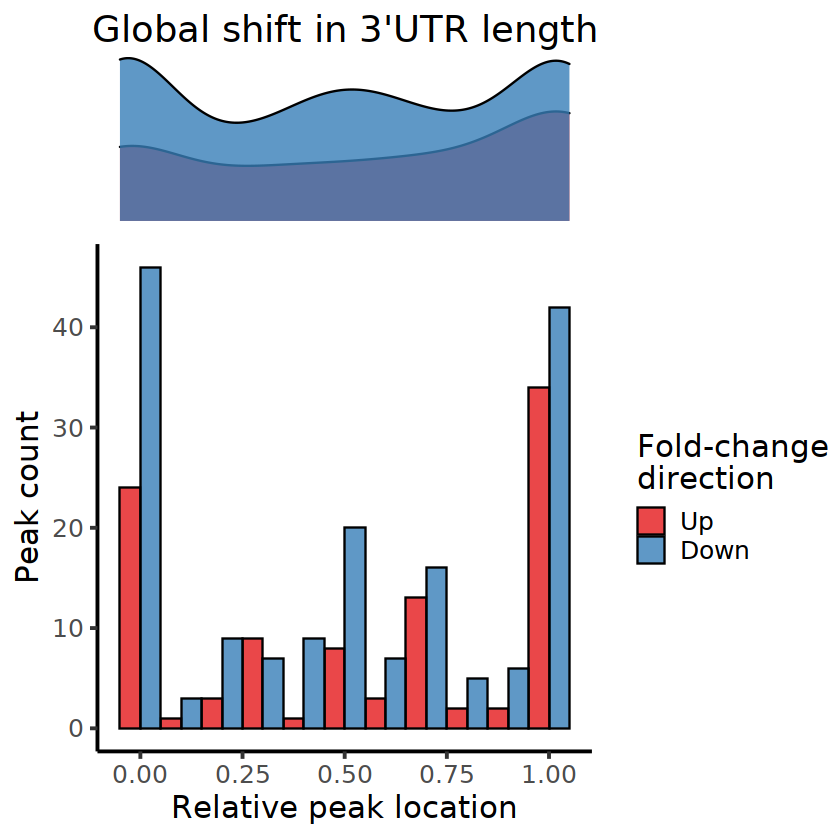

In [28]:
ALS_peaks_so <- SetIdent(ALS_peaks_so, value = ALS_peaks_so$cond)
utrshift_table <- DetectUTRLengthShift(peaks.object = ALS_peaks_so, 
                                          gtf_gr = gtf_gr,
                                          gtf_TxDb = gtf_TxDb,
                                          population.1 = 'ALS', 
                                          population.2 = 'control')
PlotUTRLengthShift(utrshift_table)

In [31]:
ALS_peaks_so <- SetIdent(ALS_peaks_so, value = ALS_peaks_so$diagnosis_celltype)

## lets do the UTR shifts per Celltype-diagnosis

In [30]:
## C9ALSnoFTLD
source("/home/aiden/codes/APA_stuff/post_qual/APA/For_ALS_atlas_paper/plot_utr_shift_adjusted.r")
utr_shift_analysis <- function(peaks_als_so, pop.1, pop.2){
    saving_root <- "/home/aiden/codes/APA_stuff/post_qual/APA/For_ALS_atlas_paper/UTR_shift_results_2"
    utrshift_table <- DetectUTRLengthShift(peaks.object = peaks_als_so, 
                                          gtf_gr = gtf_gr,
                                          gtf_TxDb = gtf_TxDb,
                                          population.1 = pop.1, 
                                          population.2 = pop.2)

    res_table_out <- paste0(saving_root,"/",pop.1,"_utr_shift_table.tsv")
    write.table(utrshift_table, file=res_table_out, sep="\t", quote=F)
    plt <- PlotUTRLengthShift_2(utrshift_table)
    plot_name <- paste0(saving_root,"/",pop.1,"_utr_shift_plot.pdf")
    pdf(file = plot_name)
    print(plt)
    dev.off()
}

[1] "12003 expressed peaks in feature types UTR3"
[1] "11313 peaks after filtering out A-rich annotations"
[1] "2434 genes detected with multiple peak sites expressed"
[1] "9031 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"
[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 4.00319764539992e-06"


png 
  2

In [38]:
remove(ge_so)

In [32]:
utr_shift_analysis(ALS_peaks_so, "C9ALSnoFTLD_Excitatory", "control_Excitatory")
utr_shift_analysis(ALS_peaks_so, "C9ALSFTLD_Excitatory", "control_Excitatory")
utr_shift_analysis(ALS_peaks_so, "C9noALSnoFTLD_Excitatory", "control_Excitatory")
utr_shift_analysis(ALS_peaks_so, "sALSnoFTLD_Excitatory", "control_Excitatory")

[1] "12003 expressed peaks in feature types UTR3"
[1] "11313 peaks after filtering out A-rich annotations"
[1] "2434 genes detected with multiple peak sites expressed"
[1] "9031 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"
[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 4.00319764539992e-06"


png 
  2

[1] "14462 expressed peaks in feature types UTR3"
[1] "13647 peaks after filtering out A-rich annotations"
[1] "2960 genes detected with multiple peak sites expressed"
[1] "10811 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"
[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 2.02585662031561e-64"


png 
  2

[1] "12036 expressed peaks in feature types UTR3"
[1] "11364 peaks after filtering out A-rich annotations"
[1] "2464 genes detected with multiple peak sites expressed"
[1] "9032 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"
[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 4.78693265426874e-24"


png 
  2

[1] "12658 expressed peaks in feature types UTR3"
[1] "11932 peaks after filtering out A-rich annotations"
[1] "2547 genes detected with multiple peak sites expressed"
[1] "9496 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"
[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 6.68770818113123e-27"


png 
  2

In [45]:
utr_shift_analysis(ALS_peaks_so, "C9ALSFTLD_Inhibitory", "control_Inhibitory")
utr_shift_analysis(ALS_peaks_so, "C9ALSnoFTLD_Inhibitory", "control_Inhibitory")
utr_shift_analysis(ALS_peaks_so, "C9noALSnoFTLD_Inhibitory", "control_Inhibitory")
utr_shift_analysis(ALS_peaks_so, "sALSnoFTLD_Inhibitory", "control_Inhibitory")

[1] "11178 expressed peaks in feature types UTR3"
[1] "10603 peaks after filtering out A-rich annotations"
[1] "2294 genes detected with multiple peak sites expressed"
[1] "8265 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"
[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 2.24786043537978e-42"


png 
  2

[1] "8464 expressed peaks in feature types UTR3"
[1] "8047 peaks after filtering out A-rich annotations"
[1] "1741 genes detected with multiple peak sites expressed"
[1] "6369 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"
[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 8.06123423205966e-14"


png 
  2

[1] "8955 expressed peaks in feature types UTR3"
[1] "8515 peaks after filtering out A-rich annotations"
[1] "1833 genes detected with multiple peak sites expressed"
[1] "6691 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"
[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 3.00020343112635e-27"


png 
  2

[1] "12106 expressed peaks in feature types UTR3"
[1] "11475 peaks after filtering out A-rich annotations"
[1] "2463 genes detected with multiple peak sites expressed"
[1] "9002 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"
[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 7.58612400449969e-101"


png 
  2

In [46]:
utr_shift_analysis(ALS_peaks_so, "C9ALSFTLD_Astrocytes", "control_Astrocytes")
utr_shift_analysis(ALS_peaks_so, "C9ALSnoFTLD_Astrocytes", "control_Astrocytes")
utr_shift_analysis(ALS_peaks_so, "C9noALSnoFTLD_Astrocytes", "control_Astrocytes")
utr_shift_analysis(ALS_peaks_so, "sALSnoFTLD_Astrocytes", "control_Astrocytes")

[1] "7526 expressed peaks in feature types UTR3"
[1] "7140 peaks after filtering out A-rich annotations"
[1] "1549 genes detected with multiple peak sites expressed"
[1] "5432 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"
[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 9.5704212093924e-06"


png 
  2

[1] "7752 expressed peaks in feature types UTR3"
[1] "7340 peaks after filtering out A-rich annotations"
[1] "1573 genes detected with multiple peak sites expressed"
[1] "5613 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"
[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 1.20113629684573e-41"


png 
  2

[1] "7427 expressed peaks in feature types UTR3"
[1] "7048 peaks after filtering out A-rich annotations"
[1] "1527 genes detected with multiple peak sites expressed"
[1] "5361 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."


-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

Warning message in vst(exp(alleffects), object):
"Dispersion function not parametric, applying log2(x+ 1) instead of vst...
"


[1] "Detecting shifts in 3'UTR length usage"
[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 9.07530914712045e-09"


png 
  2

[1] "7896 expressed peaks in feature types UTR3"
[1] "7495 peaks after filtering out A-rich annotations"
[1] "1640 genes detected with multiple peak sites expressed"
[1] "5748 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"
[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 1.00442930616801e-18"


png 
  2

In [ ]:
utr_shift_analysis(ALS_peaks_so, "C9ALSFTLD_Astrocytes", "control_Astrocytes")
utr_shift_analysis(ALS_peaks_so, "C9ALSnoFTLD_Astrocytes", "control_Astrocytes")
utr_shift_analysis(ALS_peaks_so, "C9noALSnoFTLD_Astrocytes", "control_Astrocytes")
utr_shift_analysis(ALS_peaks_so, "sALSnoFTLD_Astrocytes", "control_Astrocytes")

[1] "7526 expressed peaks in feature types UTR3"
[1] "7140 peaks after filtering out A-rich annotations"
[1] "1549 genes detected with multiple peak sites expressed"
[1] "5432 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


In [ ]:
utr_shift_analysis(ALS_peaks_so, "C9ALSFTLD_Oligodendrocytes", "control_Oligodendrocytes")
utr_shift_analysis(ALS_peaks_so, "C9ALSnoFTLD_Oligodendrocytes", "control_Oligodendrocytes")
utr_shift_analysis(ALS_peaks_so, "C9noALSnoFTLD_Oligodendrocytes", "control_Oligodendrocytes")
utr_shift_analysis(ALS_peaks_so, "sALSnoFTLD_Oligodendrocytes", "control_Oligodendrocytes")

In [ ]:
utr_shift_analysis(ALS_peaks_so, "C9ALSFTLD_Microglia", "control_Microglia")
utr_shift_analysis(ALS_peaks_so, "C9ALSnoFTLD_Microglia", "control_Microglia")
utr_shift_analysis(ALS_peaks_so, "C9noALSnoFTLD_Microglia", "control_Microglia")
utr_shift_analysis(ALS_peaks_so, "sALSnoFTLD_Microglia", "control_Microglia")

In [ ]:
utr_shift_analysis(ALS_peaks_so, "C9ALSFTLD_OPC", "control_OPC")
utr_shift_analysis(ALS_peaks_so, "C9ALSnoFTLD_OPC", "control_OPC")
utr_shift_analysis(ALS_peaks_so, "C9noALSnoFTLD_OPC", "control_OPC")
utr_shift_analysis(ALS_peaks_so, "sALSnoFTLD_OPC", "control_OPC")

In [52]:
saveRDS(ALS_peaks_so,file = "rdata/ALS_peaks_so_second_run_md_added.rds")

## ok now its time to get the UTR seqs for the for celltypes and  sub pathologies

In [3]:
ALS_peaks_so <- readRDS('rdata/ALS_peaks_so_second_run_md_added.rds')

In [4]:
peak.annotations <- read.table("sierra_out_2/ALS_paul_peaks_annotated.txt", 
                               header = TRUE,
                               sep = "\t",
                               row.names = 1,
                               stringsAsFactors = FALSE)

In [7]:
utr_shift_files_dir <- "/home/aiden/codes/APA_stuff/post_qual/APA/For_ALS_atlas_paper/UTR_shift_results"
utr_shift_files <- list.files(utr_shift_files_dir, pattern = "*.tsv")
utr_shift_files

[1] "C9ALSFTLD_Astrocytes_utr_shift_table.tsv"          
 [2] "C9ALSFTLD_Excitatory_utr_shift_table.tsv"          
 [3] "C9ALSFTLD_Inhibitory_utr_shift_table.tsv"          
 [4] "C9ALSFTLD_Microglia_utr_shift_table.tsv"           
 [5] "C9ALSFTLD_Oligodendrocytes_utr_shift_table.tsv"    
 [6] "C9ALSFTLD_OPC_utr_shift_table.tsv"                 
 [7] "C9ALSnoFTLD_Astrocytes_utr_shift_table.tsv"        
 [8] "C9ALSnoFTLD_Excitatory_utr_shift_table.tsv"        
 [9] "C9ALSnoFTLD_Excitatoryutr_shift_table.tsv"         
[10] "C9ALSnoFTLD_Inhibitory_utr_shift_table.tsv"        
[11] "C9ALSnoFTLD_Microglia_utr_shift_table.tsv"         
[12] "C9ALSnoFTLD_Oligodendrocytes_utr_shift_table.tsv"  
[13] "C9ALSnoFTLD_OPC_utr_shift_table.tsv"               
[14] "C9noALSnoFTLD_Astrocytes_utr_shift_table.tsv"      
[15] "C9noALSnoFTLD_Excitatory_utr_shift_table.tsv"      
[16] "C9noALSnoFTLD_Inhibitory_utr_shift_table.tsv"      
[17] "C9noALSnoFTLD_Microglia_utr_shift_table.tsv"       
[18] "C9noALSnoFTLD_Oligodendrocytes_utr_shift_table.tsv"
[19] "C9noALSnoFTLD_OPC_utr_shift_table.tsv"             
[20] "sALSnoFTLD_Astrocytes_utr_shift_table.tsv"         
[21] "sALSnoFTLD_Excitatory_utr_shift_table.tsv"         
[22] "sALSnoFTLD_Inhibitory_utr_shift_table.tsv"         
[23] "sALSnoFTLD_Microglia_utr_shift_table.tsv"          
[24] "sALSnoFTLD_Oligodendrocytes_utr_shift_table.tsv"   
[25] "sALSnoFTLD_OPC_utr_shift_table.tsv"

In [23]:
source('/home/aiden/codes/APA_stuff/post_qual/APA/usefull_functions.R')

In [32]:
results <- list()
for (f in utr_shift_files){
    diagnosis_CT <- gsub("_utr_shift_table.tsv","",f)
    utr_shift_table <- read.table(paste0(utr_shift_files_dir,"/",f), sep='\t')
    results <- list(c(diagnosis_CT,"utr_shift_table"))
    get_UTR_seqs(results, ALS_peaks_so, peak.annotations, gtf_TxDb)
}

[1] "processing the  C9ALSFTLD_Astrocytes results"


The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1



[1] "processing the  C9ALSFTLD_Excitatory results"


The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not p

[1] "processing the  C9ALSFTLD_Inhibitory results"


The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not presen

[1] "processing the  C9ALSFTLD_Microglia results"


The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not prese

[1] "processing the  C9ALSFTLD_Oligodendrocytes results"


The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not prese

[1] "processing the  C9ALSFTLD_OPC results"


The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not pres

[1] "processing the  C9ALSnoFTLD_Astrocytes results"


The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1



[1] "processing the  C9ALSnoFTLD_Excitatory results"


The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not p

[1] "processing the  C9ALSnoFTLD_Excitatoryutr_shift_table.tsv results"


The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not p

[1] "processing the  C9ALSnoFTLD_Inhibitory results"


The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not pres

[1] "processing the  C9ALSnoFTLD_Microglia results"


The following `from` values were not present in `x`: 1



[1] "processing the  C9ALSnoFTLD_Oligodendrocytes results"


The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1



[1] "processing the  C9ALSnoFTLD_OPC results"


The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1



[1] "processing the  C9noALSnoFTLD_Astrocytes results"


The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not p

[1] "processing the  C9noALSnoFTLD_Excitatory results"


The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not pres

[1] "processing the  C9noALSnoFTLD_Inhibitory results"


The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present

[1] "processing the  C9noALSnoFTLD_Microglia results"


The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1



[1] "processing the  C9noALSnoFTLD_Oligodendrocytes results"


The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not pr

[1] "processing the  C9noALSnoFTLD_OPC results"


The following `from` values were not present in `x`: 1



[1] "processing the  sALSnoFTLD_Astrocytes results"


The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not pres

[1] "processing the  sALSnoFTLD_Excitatory results"


The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not pr

[1] "processing the  sALSnoFTLD_Inhibitory results"


The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not pres

[1] "processing the  sALSnoFTLD_Microglia results"


The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not pr

[1] "processing the  sALSnoFTLD_Oligodendrocytes results"


The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not prese

[1] "processing the  sALSnoFTLD_OPC results"


The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

Warning message in if (strand == "1") {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (strand == "-1") {:
"the condition has length > 1 and only the first element 

```
for f in *.bed; do out=${f/.bed/_seqs.fa}; bedtools getfasta -fi ~/data/refgenome/refdata-gex-GRCh38-2020-A/fasta/genome.fa -bed $f -name -fo $out; done
```

````
for f in *.fa; do python dna_to_rna.py $f; done
````

# kk we got the motifs and RBPs, lets plot the rbps de on our ge_so object
## subset ge_so for each celltype
### read in the rbp list
#### run the DE volcano

In [37]:
table(ge_so$celltype)


Oligodendrocytes              OPC       Astrocytes        Microglia 
           46730             6849            13200             4150 
     Endothelial       Excitatory       Inhibitory 
             135            12105             9905 

In [2]:
## 
# DE_volcano_rbps <- function(so, pathology, features, saving_root, celltype_name){
#     features <- unique(features[which(features %in% rownames(so@assays$SCT))])
#     so <- SetIdent(so, value = so$group)
#     rbp_DE <- FindMarkers(so, features = features,
#                                   ident.1 = pathology , ident.2 = 'control' ,
#                                   logfc.threshold = 0.25, test.use = "wilcox")
#     rbp_DE$names <- rownames(rbp_DE)
#     plt <- EnhancedVolcano(rbp_DE, lab = rbp_DE$names,
#                     x = 'avg_log2FC', y = 'p_val_adj',
#                     FCcutoff = 0.25,  pointSize = 3.0,
#                     title = paste0(pathology, ' vs control'),
#                     drawConnectors = TRUE, widthConnectors = 0.75,
#                     labSize = 6.0,
#                     legendLabels=c('Not sig.','Log (base 2) FC','p-value',
#                     'p-value & Log (base 2) FC'))
#     plot_name <- paste0(saving_root,"/",celltype_name,"_",pathology,"_","rbp_de_volcano.pdf")
#     pdf(file = plot_name)
#     print(plt)
#     dev.off()

# }
# selectLab = rownames(rbp_DE)
# with all labels
DE_volcano_rbps <- function(so, pathology, features, saving_root, celltype_name){
    features <- unique(features[which(features %in% rownames(so@assays$SCT))])
    so <- SetIdent(so, value = so$group)
    rbp_DE <- FindMarkers(so, features = features,
                                  ident.1 = pathology , ident.2 = 'control' ,
                                  logfc.threshold = 0.05, test.use = "wilcox")
    rbp_DE$names <- rownames(rbp_DE)
    plt <- EnhancedVolcano(rbp_DE,
                    x = 'avg_log2FC', y = 'p_val_adj',
                    FCcutoff = 0.5,  pointSize = 3.0,
                    title = paste0(pathology, ' vs control'),
                    drawConnectors = TRUE, widthConnectors = 0.75,
                    lab = rownames(rbp_DE),
                    selectLab = rownames(rbp_DE),
                    xlab = bquote(~Log[2]~ 'fold change'),
                    labSize = 6.0,
                    legendLabels=c('Not sig.','Log (base 2) FC','p-value',
                    'p-value & Log (base 2) FC'))
    plot_name <- paste0(saving_root,"/",celltype_name,"_",pathology,"_","rbp_de_volcano.pdf")
    pdf(file = plot_name)
    print(plt)
    dev.off()

}

In [4]:
## main celltypes
saving_dir <- "/data1/APA/Paul_ALS_Data/results/motif_analysis/rbps_de_volcanos_2/"
run_rpb_de <- function(so, ct, saving_dir, sub_pat, rbp_features){
    sub_so <- subset(so, subset=celltype==ct)
    sub_so <- SetIdent(sub_so, value = sub_so$group)
    DE_volcano_rbps(sub_so,sub_pat,rbp_features,saving_dir,ct)
}

In [5]:
read_rbps <- function(file_name){
    ## read in the rbps for excitatory ns:
    file_name <- paste0(file_name,"/rbps_list.txt")
    rbps <- read.table(file_name, sep=",")
    rbps <- t(rbps)
    rbps <- rbps[which(!startsWith(rbps, 'STREME'))]
    rbps <- toupper(rbps) 
    return(rbps)
}

In [10]:
tomtom_res <- list.dirs('/data1/APA/Paul_ALS_Data/results/motif_analysis/third_run_upregulated_utr_regions_all_sense_RNAs')
tomtom_res <- tomtom_res[which(endsWith(tomtom_res,suffix = "_res"))]
tomtom_res

[1] "/data1/APA/Paul_ALS_Data/results/motif_analysis/third_run_upregulated_utr_regions_all_sense_RNAs/C9ALSFTLD_Excitatory_tomto_res"          
 [2] "/data1/APA/Paul_ALS_Data/results/motif_analysis/third_run_upregulated_utr_regions_all_sense_RNAs/C9ALSFTLD_Inhibitory_tomto_res"          
 [3] "/data1/APA/Paul_ALS_Data/results/motif_analysis/third_run_upregulated_utr_regions_all_sense_RNAs/C9ALSFTLD_Microglia_tomto_res"           
 [4] "/data1/APA/Paul_ALS_Data/results/motif_analysis/third_run_upregulated_utr_regions_all_sense_RNAs/C9ALSFTLD_Oligodendrocytes_tomto_res"    
 [5] "/data1/APA/Paul_ALS_Data/results/motif_analysis/third_run_upregulated_utr_regions_all_sense_RNAs/C9ALSFTLD_OPC_tomto_res"                 
 [6] "/data1/APA/Paul_ALS_Data/results/motif_analysis/third_run_upregulated_utr_regions_all_sense_RNAs/C9ALSnoFTLD_Astrocytes_tomto_res"        
 [7] "/data1/APA/Paul_ALS_Data/results/motif_analysis/third_run_upregulated_utr_regions_all_sense_RNAs/C9ALSnoFTLD_Excitatory_tomto_res"        
 [8] "/data1/APA/Paul_ALS_Data/results/motif_analysis/third_run_upregulated_utr_regions_all_sense_RNAs/C9ALSnoFTLD_Inhibitory_tomto_res"        
 [9] "/data1/APA/Paul_ALS_Data/results/motif_analysis/third_run_upregulated_utr_regions_all_sense_RNAs/C9ALSnoFTLD_Oligodendrocytes_tomto_res"  
[10] "/data1/APA/Paul_ALS_Data/results/motif_analysis/third_run_upregulated_utr_regions_all_sense_RNAs/C9ALSnoFTLD_OPC_tomto_res"               
[11] "/data1/APA/Paul_ALS_Data/results/motif_analysis/third_run_upregulated_utr_regions_all_sense_RNAs/C9noALSnoFTLD_Astrocytes_tomto_res"      
[12] "/data1/APA/Paul_ALS_Data/results/motif_analysis/third_run_upregulated_utr_regions_all_sense_RNAs/C9noALSnoFTLD_Excitatory_tomto_res"      
[13] "/data1/APA/Paul_ALS_Data/results/motif_analysis/third_run_upregulated_utr_regions_all_sense_RNAs/C9noALSnoFTLD_Inhibitory_tomto_res"      
[14] "/data1/APA/Paul_ALS_Data/results/motif_analysis/third_run_upregulated_utr_regions_all_sense_RNAs/C9noALSnoFTLD_Microglia_tomto_res"       
[15] "/data1/APA/Paul_ALS_Data/results/motif_analysis/third_run_upregulated_utr_regions_all_sense_RNAs/C9noALSnoFTLD_Oligodendrocytes_tomto_res"
[16] "/data1/APA/Paul_ALS_Data/results/motif_analysis/third_run_upregulated_utr_regions_all_sense_RNAs/sALSnoFTLD_Astrocytes_tomto_res"         
[17] "/data1/APA/Paul_ALS_Data/results/motif_analysis/third_run_upregulated_utr_regions_all_sense_RNAs/sALSnoFTLD_Excitatory_tomto_res"         
[18] "/data1/APA/Paul_ALS_Data/results/motif_analysis/third_run_upregulated_utr_regions_all_sense_RNAs/sALSnoFTLD_Inhibitory_tomto_res"         
[19] "/data1/APA/Paul_ALS_Data/results/motif_analysis/third_run_upregulated_utr_regions_all_sense_RNAs/sALSnoFTLD_Microglia_tomto_res"          
[20] "/data1/APA/Paul_ALS_Data/results/motif_analysis/third_run_upregulated_utr_regions_all_sense_RNAs/sALSnoFTLD_Oligodendrocytes_tomto_res"   
[21] "/data1/APA/Paul_ALS_Data/results/motif_analysis/third_run_upregulated_utr_regions_all_sense_RNAs/sALSnoFTLD_OPC_tomto_res"

In [7]:
tomtom_res

character(0)

In [28]:
pat_CT <- str_split(tomtom_res, "/", n = Inf, simplify = TRUE)[,8]
pats <- str_split(pat_CT, "_", n = Inf, simplify = TRUE)[,1]
CTs <- str_split(pat_CT, "_", n = Inf, simplify = TRUE)[,2]
CTs
pats

[1] "Excitatory"       "Inhibitory"       "Microglia"        "Oligodendrocytes"
 [5] "OPC"              "Astrocytes"       "Excitatory"       "Inhibitory"      
 [9] "Oligodendrocytes" "OPC"              "Astrocytes"       "Excitatory"      
[13] "Inhibitory"       "Microglia"        "Oligodendrocytes" "Astrocytes"      
[17] "Excitatory"       "Inhibitory"       "Microglia"        "Oligodendrocytes"
[21] "OPC"

[1] "C9ALSFTLD"     "C9ALSFTLD"     "C9ALSFTLD"     "C9ALSFTLD"    
 [5] "C9ALSFTLD"     "C9ALSnoFTLD"   "C9ALSnoFTLD"   "C9ALSnoFTLD"  
 [9] "C9ALSnoFTLD"   "C9ALSnoFTLD"   "C9noALSnoFTLD" "C9noALSnoFTLD"
[13] "C9noALSnoFTLD" "C9noALSnoFTLD" "C9noALSnoFTLD" "sALSnoFTLD"   
[17] "sALSnoFTLD"    "sALSnoFTLD"    "sALSnoFTLD"    "sALSnoFTLD"   
[21] "sALSnoFTLD"

In [35]:
for(res in tomtom_res){
    pat_CT <- str_split(res, "/", n = Inf, simplify = TRUE)[,8]
    pats <- str_split(pat_CT, "_", n = Inf, simplify = TRUE)[,1]
    CTs <- str_split(pat_CT, "_", n = Inf, simplify = TRUE)[,2]
    rbp_features <- read_rbps(res)
    tryCatch({
    run_rpb_de(ge_so,CTs, saving_dir,pats,rbp_features)}, error=function(e){})
    
}

Warning message in read.table(file_name, sep = ","):
"incomplete final line found by readTableHeader on '/data1/APA/Paul_ALS_Data/results/motif_analysis/third_run_upregulated_utr_regions_all_sense_RNAs/C9ALSFTLD_Excitatory_tomto_res/rbps_list.txt'"
Warning message:
"ggrepel: 37 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message in read.table(file_name, sep = ","):
"incomplete final line found by readTableHeader on '/data1/APA/Paul_ALS_Data/results/motif_analysis/third_run_upregulated_utr_regions_all_sense_RNAs/C9ALSFTLD_Inhibitory_tomto_res/rbps_list.txt'"
Warning message:
"ggrepel: 40 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message in read.table(file_name, sep = ","):
"incomplete final line found by readTableHeader on '/data1/APA/Paul_ALS_Data/results/motif_analysis/third_run_upregulated_utr_regions_all_sense_RNAs/C9ALSFTLD_Microglia_tomto_res/rbps_list.txt'"
Warning message in read.table(file_name,